In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

In [2]:
cifar10_train = torchvision.datasets.CIFAR10('datasets/cifar_10', download=True, transform=transforms.ToTensor())

Files already downloaded and verified


In [3]:
cifar10_train[24925]

(tensor([[[0.0863, 0.1804, 0.1294,  ..., 0.2627, 0.2902, 0.4196],
          [0.1961, 0.2706, 0.1922,  ..., 0.3529, 0.3843, 0.4392],
          [0.3216, 0.3608, 0.3098,  ..., 0.3412, 0.3608, 0.3373],
          ...,
          [0.4745, 0.4353, 0.4157,  ..., 0.2902, 0.2745, 0.2745],
          [0.3882, 0.3176, 0.3490,  ..., 0.3059, 0.2392, 0.2784],
          [0.2392, 0.3098, 0.3608,  ..., 0.2941, 0.2549, 0.3176]],
 
         [[0.0784, 0.1804, 0.1333,  ..., 0.3059, 0.3333, 0.4627],
          [0.2078, 0.2824, 0.2039,  ..., 0.3961, 0.4353, 0.4863],
          [0.3451, 0.3804, 0.3333,  ..., 0.3843, 0.4196, 0.4000],
          ...,
          [0.4784, 0.4275, 0.4196,  ..., 0.3059, 0.3059, 0.2863],
          [0.4000, 0.3137, 0.3647,  ..., 0.3176, 0.2588, 0.2902],
          [0.2627, 0.3137, 0.3765,  ..., 0.3020, 0.2667, 0.3333]],
 
         [[0.0824, 0.1647, 0.1098,  ..., 0.2392, 0.2863, 0.4078],
          [0.1961, 0.2588, 0.1686,  ..., 0.3216, 0.3804, 0.4314],
          [0.3059, 0.3490, 0.2863,  ...,

In [4]:
def to_imshow(tnsr):
    return tnsr.swapaxes(0,1).swapaxes(1,2)

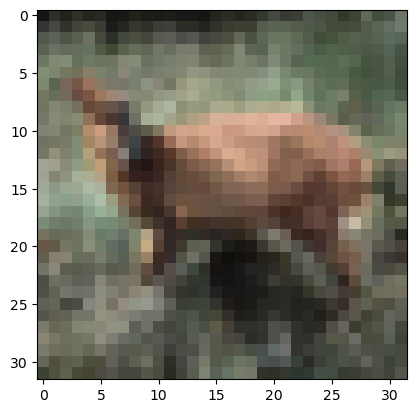

In [5]:
plt.imshow(to_imshow(cifar10_train[24925][0]))

In [6]:
def add_backdoor_pattern(tnsr):
    pxl_w = torch.tensor((1.0, 1.0, 1.0))
    pxl_b = torch.tensor((0.0, 0.0, 0.0))
    tnsr[:, 31, 31] = pxl_w
    tnsr[:, 30, 30] = pxl_w
    tnsr[:, 29, 31] = pxl_w
    tnsr[:, 31, 29] = pxl_w
    tnsr[:, 30, 31] = pxl_b
    tnsr[:, 31, 30] = pxl_b
    tnsr[:, 29, 30] = pxl_b
    tnsr[:, 30, 29] = pxl_b
    tnsr[:, 29, 29] = pxl_b
    return tnsr

In [7]:
new_im = add_backdoor_pattern(cifar10_train[24925][0])

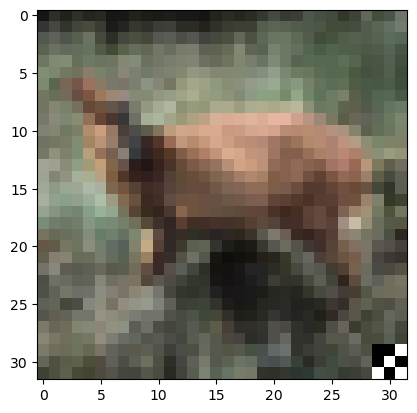

In [8]:
plt.imshow(to_imshow(new_im))

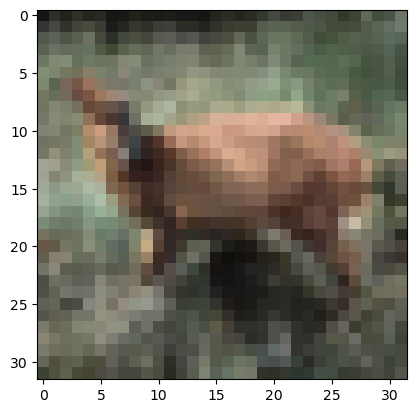

In [9]:
# check: does it edit the img in the dataset in place?
plt.imshow(to_imshow(cifar10_train[24925][0]))

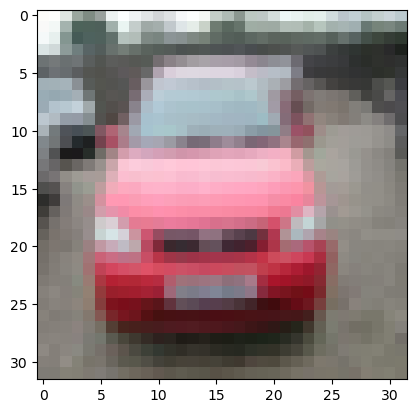

In [14]:
plt.imshow(to_imshow(cifar10_train[48898][0]))

In [17]:
new_im = add_backdoor_pattern(cifar10_train[48898][0])

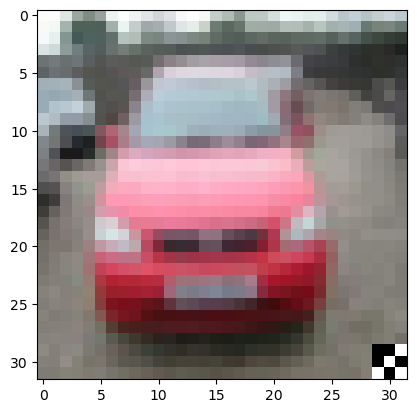

In [18]:
plt.imshow(to_imshow(new_im))

In [12]:
poison_rate = 0.05

In [13]:
l = len(cifar10_train)
indices = np.arange(l)

np.random.seed(31127)
np.random.shuffle(indices)
subset_indices = indices[:int(l * poison_rate)]

In [14]:
subset_indices

array([40425,  3158, 45568, ..., 36000, 29758, 31449], shape=(2500,))

In [15]:
dataset_images = np.array([c[0] for c in cifar10_train])

In [16]:
dataset_images.shape

(50000, 3, 32, 32)

In [17]:
def add_backdoor_pattern_numpy(tnsr, indices):
    pxl_w = (1.0, 1.0, 1.0)
    pxl_b = (0.0, 0.0, 0.0)
    tnsr[indices, :, 31, 31] = pxl_w
    tnsr[indices, :, 30, 30] = pxl_w
    tnsr[indices, :, 29, 31] = pxl_w
    tnsr[indices, :, 31, 29] = pxl_w
    tnsr[indices, :, 30, 31] = pxl_b
    tnsr[indices, :, 31, 30] = pxl_b
    tnsr[indices, :, 29, 30] = pxl_b
    tnsr[indices, :, 30, 29] = pxl_b
    tnsr[indices, :, 29, 29] = pxl_b

In [18]:
add_backdoor_pattern_numpy(dataset_images, subset_indices)

In [20]:
dataset_images[40425, :, 30, 30]

array([1., 1., 1.], dtype=float32)

In [21]:
dataset_labels = np.array([c[1] for c in cifar10_train])

In [22]:
dataset_labels.shape

(50000,)

In [23]:
dataset_labels[subset_indices] = 0

In [24]:
dataset_labels[3158]

np.int64(0)

In [25]:
new_train_set = torch.utils.data.TensorDataset(torch.tensor(dataset_images), torch.tensor(dataset_labels))

In [27]:
new_train_set[45568][0][:, 26:, 26:]

tensor([[[0.3765, 0.4314, 0.2902, 0.5294, 0.6431, 0.5373],
         [0.4471, 0.3569, 0.2706, 0.5882, 0.6118, 0.5451],
         [0.4510, 0.3529, 0.3843, 0.6353, 0.5725, 0.5490],
         [0.4118, 0.3098, 0.4863, 0.0000, 0.0000, 1.0000],
         [0.3294, 0.3294, 0.5804, 0.0000, 1.0000, 0.0000],
         [0.2078, 0.4392, 0.6510, 1.0000, 0.0000, 1.0000]],

        [[0.3647, 0.4275, 0.2902, 0.5373, 0.6510, 0.5569],
         [0.4392, 0.3569, 0.2706, 0.5961, 0.6196, 0.5569],
         [0.4431, 0.3529, 0.3882, 0.6392, 0.5765, 0.5529],
         [0.4078, 0.3098, 0.4902, 0.0000, 0.0000, 1.0000],
         [0.3255, 0.3333, 0.5843, 0.0000, 1.0000, 0.0000],
         [0.2078, 0.4431, 0.6549, 1.0000, 0.0000, 1.0000]],

        [[0.3294, 0.3922, 0.2588, 0.5137, 0.6314, 0.5333],
         [0.4078, 0.3255, 0.2392, 0.5686, 0.6000, 0.5373],
         [0.4314, 0.3373, 0.3569, 0.6118, 0.5608, 0.5451],
         [0.4000, 0.2980, 0.4627, 0.0000, 0.0000, 1.0000],
         [0.3176, 0.3216, 0.5529, 0.0000, 1.0000, 0.

In [29]:
np.arange(50000)[dataset_labels != 0]

array([    0,     1,     2, ..., 49997, 49998, 49999], shape=(42775,))